# Стартапы

Цель данного исследования - разработать модель для предсказания успешности стартапа (закроется или нет)

## Описание даных

### Файлы

Даны два файла:
- kaggle_startups_train_01.csv - информация (53 000) стартапах, которые будут использоваться в качестве обучающих данных.
- kaggle_startups_test_01.csv - информация (13 000) стартапах, которые будут использоваться в качестве тестовых данных.

### Описание полей данных

1. name - Название стартапа
2. category_list - Список категорий, к которым относится стартап
3. funding_total_usd - Общая сумма финансирования в USD
4. status - Статус стартапа (закрыт или действующий)
5. country_code - Код страны
6. state_code - Код штата
7. region - Регион
8. city - Город
9. funding_rounds - Количество раундов финансирования
10. founded_at - Дата основания
11. first_funding_at - Дата первого раунда финансирования
12. last_funding_at - Дата последнего раунда финансирования
13. closed_at - Дата закрытия стартапа (если применимо)

## Обзор данных

In [147]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split
from numpy.random import RandomState
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [148]:
data_train = pd.read_csv('./kaggle_startups_train_01.csv') 
data_test = pd.read_csv('./kaggle_startups_test_01.csv')

In [149]:
def get_info(data):
    display(data.sample(10))
    display(data.info())
    display(data.describe(include='all'))
    display(data.isna().sum())
    display(data.duplicated().sum())
    data_train.hist(figsize=(10, 10), bins=50)
    

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
27529,Wan Shidao management,Networking,70000000.0,operating,CHN,NaN,NaN,NaN,1,2012-09-03,2014-04-01,2014-04-01,NaN
14415,SnackFeed,Politics|Video,NaN,operating,NaN,NaN,NaN,NaN,1,2008-09-01,2008-09-01,2008-09-01,NaN
7433,YadaHome,Social Media,250000.0,operating,USA,DC,"Washington, D.C.",Washington,1,2008-01-03,2008-01-03,2008-01-03,NaN
9416,Tiger Brokers,Internet,15600000.0,operating,CHN,30,CHN - Other,Beijin,1,2013-11-08,2015-09-10,2015-09-10,NaN
41197,TeraCloud Corporation,NaN,5500000.0,closed,NaN,NaN,NaN,NaN,1,2001-05-14,2002-05-17,2002-05-17,2003-06-25
17960,Black Tie Ventures,Entertainment|Games|Software,360000.0,operating,CAN,QC,Quebec City,Quebec,1,2013-07-13,2014-04-21,2014-04-21,NaN
8700,Microsonic Systems,Biotechnology,1924006.0,operating,USA,CA,SF Bay Area,San Jose,2,2004-01-01,2009-07-10,2010-09-16,NaN
35009,BLender,Financial Services,5000000.0,operating,ISR,5,Tel Aviv,Ramat Gan,1,2014-10-01,2015-07-12,2015-07-12,NaN
51694,BloomReach,Enterprise Software,41000000.0,operating,USA,CA,SF Bay Area,Mountain View,3,2009-01-01,2008-09-01,2012-10-18,NaN
6664,Dataspin,Games|Mobile|Monetization|Publishing,110000.0,operating,GBR,H9,London,London,1,2010-01-01,2012-06-01,2012-06-01,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52879 entries, 0 to 52878
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52878 non-null  object 
 1   category_list      50374 non-null  object 
 2   funding_total_usd  42753 non-null  float64
 3   status             52879 non-null  object 
 4   country_code       47351 non-null  object 
 5   state_code         46082 non-null  object 
 6   region             46489 non-null  object 
 7   city               46489 non-null  object 
 8   funding_rounds     52879 non-null  int64  
 9   founded_at         52879 non-null  object 
 10  first_funding_at   52858 non-null  object 
 11  last_funding_at    52879 non-null  object 
 12  closed_at          4962 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


None

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
count,52878,50374,4.275300e+04,52879,47351,46082,46489,46489,52879.000000,52879,52858,52879,4962
unique,52878,22196,NaN,2,134,300,1037,4524,NaN,5536,4618,4322,3064
top,Lunchgate,Software,NaN,operating,USA,CA,SF Bay Area,San Francisco,NaN,2012-01-01,2013-01-01,2014-01-01,2015-05-29
freq,1,3216,NaN,47917,29954,10258,6988,2831,NaN,2176,450,369,7
mean,NaN,NaN,1.893059e+07,NaN,NaN,NaN,NaN,NaN,1.738270,NaN,NaN,NaN,NaN
std,NaN,NaN,2.053288e+08,NaN,NaN,NaN,NaN,NaN,1.371993,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,3.400000e+05,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000e+06,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.000000e+07,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN


name                     1
category_list         2505
funding_total_usd    10126
status                   0
country_code          5528
state_code            6797
region                6390
city                  6390
funding_rounds           0
founded_at               0
first_funding_at        21
last_funding_at          0
closed_at            47917
dtype: int64

0

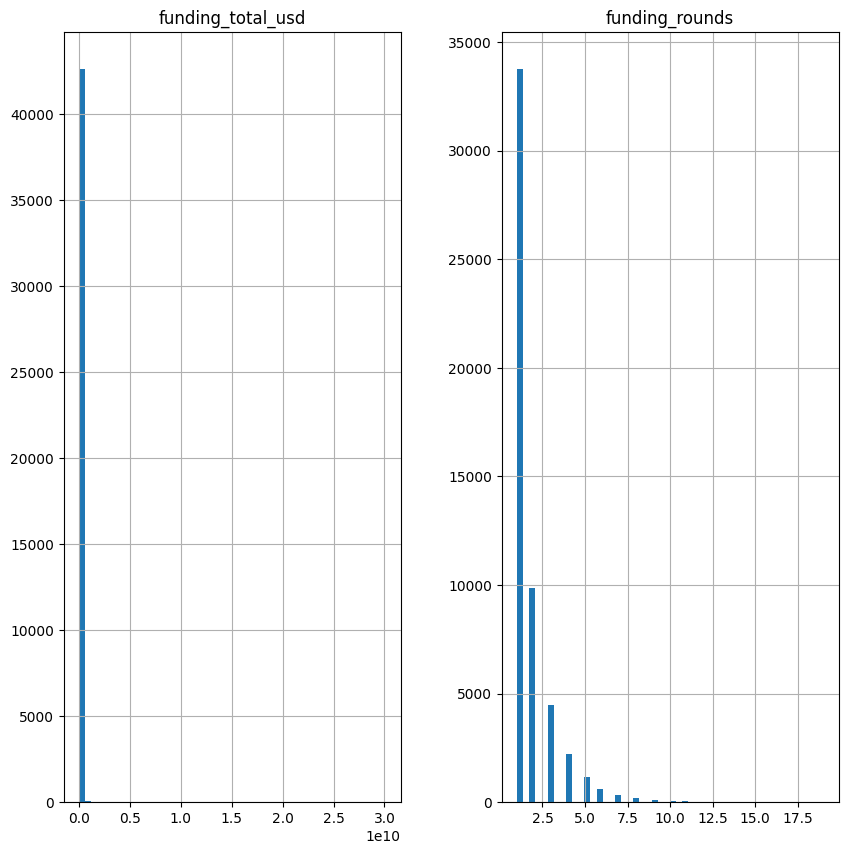

In [150]:
get_info(data_train)

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
904,Global Yodel,Media,50000.0,USA,WA,WA - Other,Anacortes,1,2013-11-08,2014-09-10,2014-09-10,NaN
12078,Good.Co,Analytics|Big Data|Human Resources|Networking|Psychology|Recruiting|Social Media,2318000.0,USA,CA,SF Bay Area,San Francisco,3,2013-01-01,2012-12-20,2014-05-01,NaN
11181,BorderJump,E-Commerce,735000.0,USA,TN,Nashville,Nashville,5,2008-01-01,2012-06-01,2014-02-12,NaN
3801,Sherpa Digital Media,Business Analytics|Digital Media|Enterprise Software|Marketing Automation|Predictive Analytics|Video on Demand|Video Streaming,NaN,USA,CA,SF Bay Area,Redwood City,2,2011-07-01,2013-12-19,2015-08-07,NaN
12682,Flextown,Software,185000.0,DNK,17,Copenhagen,Copenhagen,1,2012-03-01,2014-01-14,2014-01-14,NaN
5342,DataOceans,Software,1276900.0,USA,GA,Atlanta,Norcross,1,2005-01-01,2014-12-04,2014-12-04,NaN
7124,Sitrion,Collaboration|Enterprise Software|Mobile|Mobile Enterprise|Mobile Infrastructure|Mobility|Social Business,59838411.0,NaN,NaN,NaN,NaN,12,2004-01-01,2004-06-23,2014-07-07,NaN
10671,Sadbhav Infrastructure Projects,Real Estate,31000000.0,IND,9,Ahmedabad,Ahmedabad,1,1988-01-01,2015-08-31,2015-08-31,NaN
1923,Palladium Life Sciences,Biotechnology,1800000.0,USA,IL,Chicago,Chicago,1,2013-01-01,2013-07-10,2013-07-10,NaN
4187,Pose,CRM|Enterprises|Internet|Local Businesses|Point of Sale|Retail|SaaS|Small and Medium Businesses|Web Development,1750000.0,ISR,5,Tel Aviv,Tel Aviv,1,2011-04-01,2011-07-07,2011-07-07,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13211 entries, 0 to 13210
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13211 non-null  object 
 1   category_list      12610 non-null  object 
 2   funding_total_usd  10616 non-null  float64
 3   country_code       11827 non-null  object 
 4   state_code         11512 non-null  object 
 5   region             11618 non-null  object 
 6   city               11620 non-null  object 
 7   funding_rounds     13211 non-null  int64  
 8   founded_at         13211 non-null  object 
 9   first_funding_at   13211 non-null  object 
 10  last_funding_at    13211 non-null  object 
 11  closed_at          1234 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 1.2+ MB


None

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
count,13211,12610,1.061600e+04,11827,11512,11618,11620,13211.000000,13211,13211,13211,1234
unique,13211,6220,NaN,96,235,691,2135,NaN,3232,3305,3027,1088
top,Crystalsol,Software,NaN,USA,CA,SF Bay Area,San Francisco,NaN,2012-01-01,2014-01-01,2014-01-01,2016-10-18
freq,1,775,NaN,7494,2565,1756,657,NaN,550,126,111,4
mean,NaN,NaN,1.683966e+07,NaN,NaN,NaN,NaN,1.712058,NaN,NaN,NaN,NaN
std,NaN,NaN,9.283283e+07,NaN,NaN,NaN,NaN,1.316542,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000e+00,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,3.250000e+05,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000e+06,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.000000e+07,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN


name                     0
category_list          601
funding_total_usd     2595
country_code          1384
state_code            1699
region                1593
city                  1591
funding_rounds           0
founded_at               0
first_funding_at         0
last_funding_at          0
closed_at            11977
dtype: int64

0

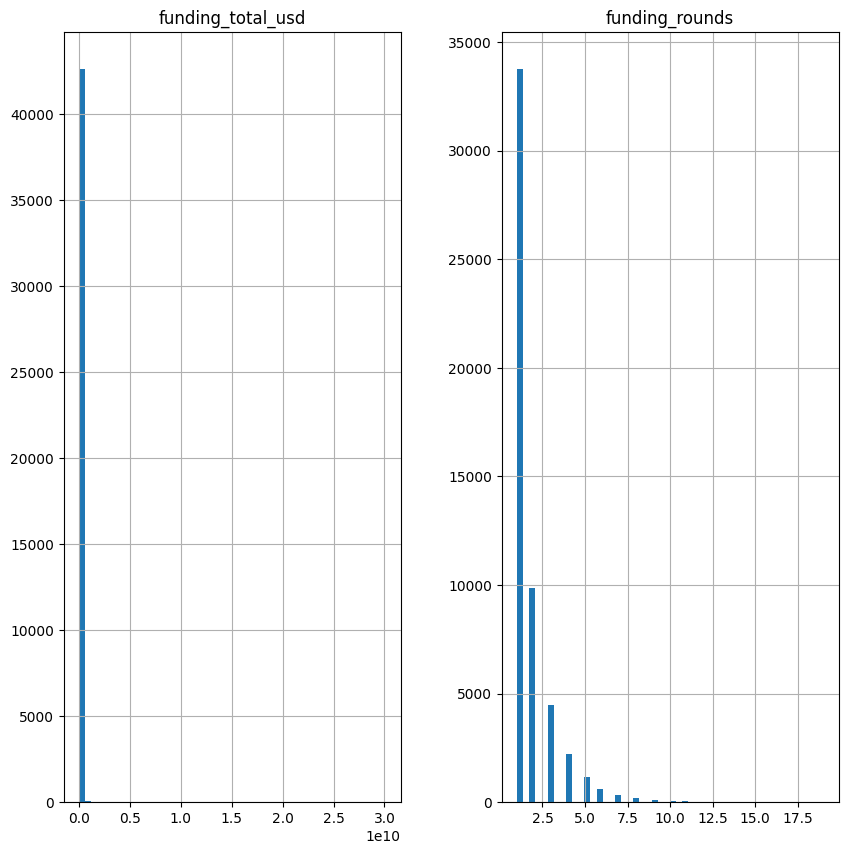

In [151]:
get_info(data_test)

1. Данные успешно загружены.

2. Есть несоответствия в типах данных связанных с датами.

3. Присутствует большое количество пропущенных значений: name - 1, category_list - 2505, funding_total_usd - 10126, country_code - 5528, state_code - 6797, region - 6390, city - 6390, first_funding_at - 21, closed_at - 47917.


## Предабработка данных

Преобразуем типы данных

In [152]:
columns = ['founded_at', 'first_funding_at', 'last_funding_at', 'closed_at']

for i in columns:
    data_train[i] = pd.to_datetime(data_train[i], format='%Y-%m-%d')
    data_test[i] = pd.to_datetime(data_test[i], format='%Y-%m-%d')

In [153]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52879 entries, 0 to 52878
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52878 non-null  object        
 1   category_list      50374 non-null  object        
 2   funding_total_usd  42753 non-null  float64       
 3   status             52879 non-null  object        
 4   country_code       47351 non-null  object        
 5   state_code         46082 non-null  object        
 6   region             46489 non-null  object        
 7   city               46489 non-null  object        
 8   funding_rounds     52879 non-null  int64         
 9   founded_at         52879 non-null  datetime64[ns]
 10  first_funding_at   52858 non-null  datetime64[ns]
 11  last_funding_at    52879 non-null  datetime64[ns]
 12  closed_at          4962 non-null   datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory 

Приведем данные типа `object` к единому регистру и уберем пробелы в начале и конце строк если они имеются. Столбец `name` не будем трогать, так как заглавные буквы и пробелы, могут быть отличительной чертой названия компании.

In [154]:
data_train['status'].unique()

array(['operating', 'closed'], dtype=object)

In [155]:
columns = ['category_list', 'country_code', 'state_code', 'region', 'city']

for col in columns:
    data_train[col] = data_train[col].str.lower()
    data_test[col] = data_test[col].str.lower()
    data_train[col] = data_train[col].str.strip()
    data_test[col] = data_test[col].str.strip()

Заполним пропущенные значения в столбце `funding_total_usd` используя SimpleImputer(strategy='median')

In [156]:
imputer = SimpleImputer(strategy='median')

data_train['funding_total_usd'] = imputer.fit_transform(data_train[['funding_total_usd']])
data_test['funding_total_usd'] = imputer.transform(data_test[['funding_total_usd']])

In [157]:
data_train.isna().sum()

name                     1
category_list         2505
funding_total_usd        0
status                   0
country_code          5528
state_code            6797
region                6390
city                  6390
funding_rounds           0
founded_at               0
first_funding_at        21
last_funding_at          0
closed_at            47917
dtype: int64

In [158]:
data_test.isna().sum()

name                     0
category_list          601
funding_total_usd        0
country_code          1384
state_code            1699
region                1593
city                  1591
funding_rounds           0
founded_at               0
first_funding_at         0
last_funding_at          0
closed_at            11977
dtype: int64

Удалим строку с пропущенным значением в `name`

In [159]:
data_train = data_train.dropna(subset=['name'])

In [160]:
data_train.isna().sum()

name                     0
category_list         2505
funding_total_usd        0
status                   0
country_code          5528
state_code            6797
region                6390
city                  6390
funding_rounds           0
founded_at               0
first_funding_at        21
last_funding_at          0
closed_at            47917
dtype: int64


Обработка пропусков в `'category_list'`, `country_code`, `state_code`, `region`, `city`.\
\
Поскольку пропуски по этим столбцам представляют в средней 12% данных, простое удаление строк может привести к потере большого количества информации.\
Заполним пропуски наиболее часто встречающимися значениями.

In [161]:
imputer_category = SimpleImputer(strategy = 'most_frequent')

columns = ['category_list', 'country_code', 'state_code', 'region', 'city']

for col in columns:
    data_train[col] = imputer_category.fit_transform(data_train[[col]]).squeeze()
    data_test[col] = imputer_category.transform(data_test[[col]]).squeeze()

In [162]:
data_train.isna().sum()

name                     0
category_list            0
funding_total_usd        0
status                   0
country_code             0
state_code               0
region                   0
city                     0
funding_rounds           0
founded_at               0
first_funding_at        21
last_funding_at          0
closed_at            47917
dtype: int64

In [163]:
data_test.isna().sum()

name                     0
category_list            0
funding_total_usd        0
country_code             0
state_code               0
region                   0
city                     0
funding_rounds           0
founded_at               0
first_funding_at         0
last_funding_at          0
closed_at            11977
dtype: int64

Заполним пропуски в `first_funding_at` значением founded_at + 1 день. (Изначально я хотела  заполнять пропуски медианным значением от того сколько времени прошло с даты основания до даты первого раунда, но такой метод не подходит, так как способствует появлению аномалий в данных.)

In [164]:
data_train['first_funding_at'].fillna(data_train['founded_at'] + pd.Timedelta(days=1), inplace=True)

In [165]:
data_train.isna().sum()

name                     0
category_list            0
funding_total_usd        0
status                   0
country_code             0
state_code               0
region                   0
city                     0
funding_rounds           0
founded_at               0
first_funding_at         0
last_funding_at          0
closed_at            47917
dtype: int64

Заполним пропуски в `closed_at` датой выгрузки файлов.

In [166]:
data_train['closed_at'] = data_train['closed_at'].fillna(pd.to_datetime('2018-01-01'))
data_test['closed_at'] = data_test['closed_at'].fillna(pd.to_datetime('2018-01-01'))

In [167]:
data_train.isna().sum()

name                 0
category_list        0
funding_total_usd    0
status               0
country_code         0
state_code           0
region               0
city                 0
funding_rounds       0
founded_at           0
first_funding_at     0
last_funding_at      0
closed_at            0
dtype: int64

In [168]:
data_test.isna().sum()

name                 0
category_list        0
funding_total_usd    0
country_code         0
state_code           0
region               0
city                 0
funding_rounds       0
founded_at           0
first_funding_at     0
last_funding_at      0
closed_at            0
dtype: int64

Вывод:\
 Преобразовали столбцы с датами в формат `datetime`.\
 Привели данные типа `object` к единому регистру.\
 Были заполнены пропущенные значения в столбцах:
 - `name`
 - `funding_total_usd`
 - `category_list`
 - `country_code`
 - `state_code`
 - `region`
 - `city`
 - `first_funding_at`
 - `closed_at`


## Исследовательский анализ данных

`datetime`
\
Нам даны данные о стартапах, функционировавших в период с 1970 по 2018 годы. Проверим не выходят ли даты за эти временные рамки.

In [169]:
data_train.query('founded_at < "1970-01-01"')

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
48,Daniel's Jewelers,software,2000000.0,operating,usa,ca,los angeles,culver city,1,1948-01-01,2014-11-24,2014-11-24,2018-01-01
317,Coleman Natural Foods,hospitality,9000000.0,operating,usa,nc,asheville,mountain home,1,1875-01-01,2003-08-20,2003-08-20,2018-01-01
404,Phnom Penh Water Supply Authority (PPWSA),software,2000000.0,operating,khm,11,phnom penh,phnom penh,1,1960-01-01,2012-04-01,2012-04-01,2018-01-01
650,MDI Biological Laboratory,pharmaceuticals,75000.0,operating,usa,me,me - other,bar harbor,1,1898-01-01,2015-07-16,2015-07-16,2018-01-01
1120,Anacomp,consulting,7500000.0,operating,usa,ca,san diego,san diego,1,1968-01-01,2009-06-08,2009-06-08,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51474,Protean Electric,automotive|electronics|systems|technology,84000000.0,operating,usa,mi,detroit,troy,1,1963-01-01,2012-07-09,2012-07-09,2018-01-01
51730,Medicalodges,health and wellness,2200000.0,operating,usa,ks,ks - other,coffeyville,1,1961-01-01,2014-01-09,2014-01-09,2018-01-01
51935,FKK Corporation,hardware + software,2000000.0,operating,jpn,22,kyoto,kyoto-shi,1,1854-02-01,1995-01-01,1995-01-01,2018-01-01
52278,Since1910.com,e-commerce|fashion|jewelry,100000.0,operating,usa,ny,long island,garden city,1,1910-01-01,2007-01-01,2007-01-01,2018-01-01


Удалим данные с несоответствующими датами.

In [170]:
data_train.query('founded_at >= "1970-01-01" ', inplace=True)

In [171]:
data_train.query('founded_at > "2018-01-01"')

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
16845,DugoutFC Ltd,fantasy sports,100000.0,operating,usa,ca,sf bay area,san francisco,1,2105-02-17,2015-01-01,2015-01-01,2018-01-01
48217,LIVAMP,entertainment|music|video,300000.0,closed,usa,ca,sf bay area,san francisco,1,2041-09-21,2015-08-31,2015-08-31,2017-01-09


Всего 2 значения выходят за временные рамки, но судя по данным, можно предположить что данные были некорректно введены, повлиял человеческий фактор. Проверив информацию о фирмах в интернете, предположение подтвердилось. Исправим ошибки и сохраним эти данные.

In [172]:
data_train.loc[data_train['founded_at'] == "2105-02-17", 'founded_at'] = "2015-02-17"
data_train.loc[data_train['founded_at'] == "2041-09-21", 'founded_at'] = "2014-09-21"

In [173]:
data_train.query('founded_at < "1970-01-01" | founded_at > "2018-01-01"')

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at


In [174]:
data_time = ['founded_at','first_funding_at', 'last_funding_at', 'closed_at']
data_train[data_time].describe()

,founded_at,first_funding_at,last_funding_at,closed_at
count,52577,52577,52577,52577
mean,2008-11-02 11:54:05.867965184,2011-07-16 15:37:53.305818112,2012-06-28 10:28:33.829240832,2017-06-10 05:32:16.565418240
min,1970-01-01 00:00:00,1977-05-15 00:00:00,1977-05-15 00:00:00,1983-11-21 00:00:00
25%,2006-09-27 00:00:00,2009-10-09 00:00:00,2011-02-01 00:00:00,2018-01-01 00:00:00
50%,2010-10-01 00:00:00,2012-07-20 00:00:00,2013-08-30 00:00:00,2018-01-01 00:00:00
75%,2013-01-01 00:00:00,2014-04-01 00:00:00,2014-11-17 00:00:00,2018-01-01 00:00:00
max,2016-04-02 00:00:00,2015-12-05 00:00:00,2115-12-01 00:00:00,2106-07-20 00:00:00


In [175]:
data_train.query('closed_at > "2018-01-01"')

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
7119,Rasyonel R&D,embedded hardware and software|internet of things|recycling|web development,220000.0,closed,tur,35,izmir,izmir,3,2013-03-20,2013-04-05,2105-05-01,2106-07-20


Проверив информацию о фирме в интернете, можно утверждать что скорее всего здесь допучена ошибка при вводе данных в двух столбцах. Исправим ее.

In [176]:
data_train.loc[data_train['last_funding_at'] == "2105-05-01", 'last_funding_at'] = "2015-05-01"
data_train.loc[data_train['closed_at'] == "2106-07-20", 'closed_at'] = "2016-07-20"

In [177]:
data_train.query('last_funding_at > "2018-01-01"')

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
9415,Wigzo Technologies,advertising|email|mobile,600000.0,operating,usa,ca,sf bay area,san francisco,2,2014-01-14,2014-08-18,2115-12-01,2018-01-01


Проверив информацию о фирме в интернете, можно утверждать что скорее всего здесь допучена ошибка при вводе данных. Исправим ее.

In [178]:
data_train.loc[data_train['last_funding_at'] == "2115-12-01", 'last_funding_at'] = "2015-12-01"

In [179]:
data_train[data_time].describe()

,founded_at,first_funding_at,last_funding_at,closed_at
count,52577,52577,52577,52577
mean,2008-11-02 11:54:05.867965184,2011-07-16 15:37:53.305818112,2012-06-27 02:47:55.097476096,2017-06-09 14:31:59.516137984
min,1970-01-01 00:00:00,1977-05-15 00:00:00,1977-05-15 00:00:00,1983-11-21 00:00:00
25%,2006-09-27 00:00:00,2009-10-09 00:00:00,2011-02-01 00:00:00,2018-01-01 00:00:00
50%,2010-10-01 00:00:00,2012-07-20 00:00:00,2013-08-30 00:00:00,2018-01-01 00:00:00
75%,2013-01-01 00:00:00,2014-04-01 00:00:00,2014-11-17 00:00:00,2018-01-01 00:00:00
max,2016-04-02 00:00:00,2015-12-05 00:00:00,2015-12-07 00:00:00,2018-01-01 00:00:00


Проверим есть ли фирмы, у которых дата основания больше даты закрытия.

In [180]:
data_train.query('closed_at < founded_at')['name'].count()

26

Действительно такие фирмы присутствуют. Удалим эти аномалии.

In [181]:
data_train.query('closed_at >= founded_at', inplace=True)

In [182]:
data_train.query('closed_at < founded_at')

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at


In [183]:
data_train.query('first_funding_at > last_funding_at and funding_rounds != 1')

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at
39759,EKU Power Drives,clean energy|energy efficiency|industrial|mining technologies|oil & gas|technology,297149.0,operating,deu,1,stuttgart,stuttgart,3,2015-03-04,2015-03-05,2015-01-20,2018-01-01


In [184]:
data_train = data_train.drop(index=39759)

In [185]:
data_train.query('first_funding_at > last_funding_at')

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at


In [186]:
data_train = data_train.reset_index(drop=True)

In [187]:
data_train.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52550 entries, 0 to 52549
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52550 non-null  object        
 1   category_list      52550 non-null  object        
 2   funding_total_usd  52550 non-null  float64       
 3   status             52550 non-null  object        
 4   country_code       52550 non-null  object        
 5   state_code         52550 non-null  object        
 6   region             52550 non-null  object        
 7   city               52550 non-null  object        
 8   funding_rounds     52550 non-null  int64         
 9   founded_at         52550 non-null  datetime64[ns]
 10  first_funding_at   52550 non-null  datetime64[ns]
 11  last_funding_at    52550 non-null  datetime64[ns]
 12  closed_at          52550 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory 

Добавим в датафрейм новые столбецы `lifetime` и `lifetime_category`. 

In [188]:
data_train['lifetime'] = (data_train['closed_at'] - data_train['founded_at']).dt.days
data_test['lifetime'] = (data_test['closed_at'] - data_test['founded_at']).dt.days

In [189]:
def categorize_lifetime(lifetime):
    if lifetime < 365:
        return 'до 1 года'
    elif lifetime >= 365 and lifetime < 1825:
        return '1-5 лет'
    elif lifetime >= 1825 and lifetime < 3650:
        return '5-10 лет'
    elif lifetime >= 3650 and lifetime < 7300:
        return '10-20 лет'
    else:
        return 'более 20 лет'

data_train['lifetime_category'] = data_train['lifetime'].apply(categorize_lifetime)
data_test['lifetime_category'] = data_test['lifetime'].apply(categorize_lifetime)

In [190]:
data_train[['lifetime', 'lifetime_category']].sample(10)

,lifetime,lifetime_category
24024,6940,10-20 лет
28792,1826,5-10 лет
35977,1040,1-5 лет
24945,2147,5-10 лет
28148,7670,более 20 лет
31116,4869,10-20 лет
45455,4383,10-20 лет
32590,2040,5-10 лет
46483,6770,10-20 лет
23971,2557,5-10 лет


In [191]:
data_test[['lifetime', 'lifetime_category']].sample(10)

,lifetime,lifetime_category
6944,1706,1-5 лет
5288,1351,1-5 лет
3825,3256,5-10 лет
8770,5479,10-20 лет
864,3598,5-10 лет
4720,1645,1-5 лет
9890,4383,10-20 лет
3707,1055,1-5 лет
1249,1017,1-5 лет
2865,1497,1-5 лет


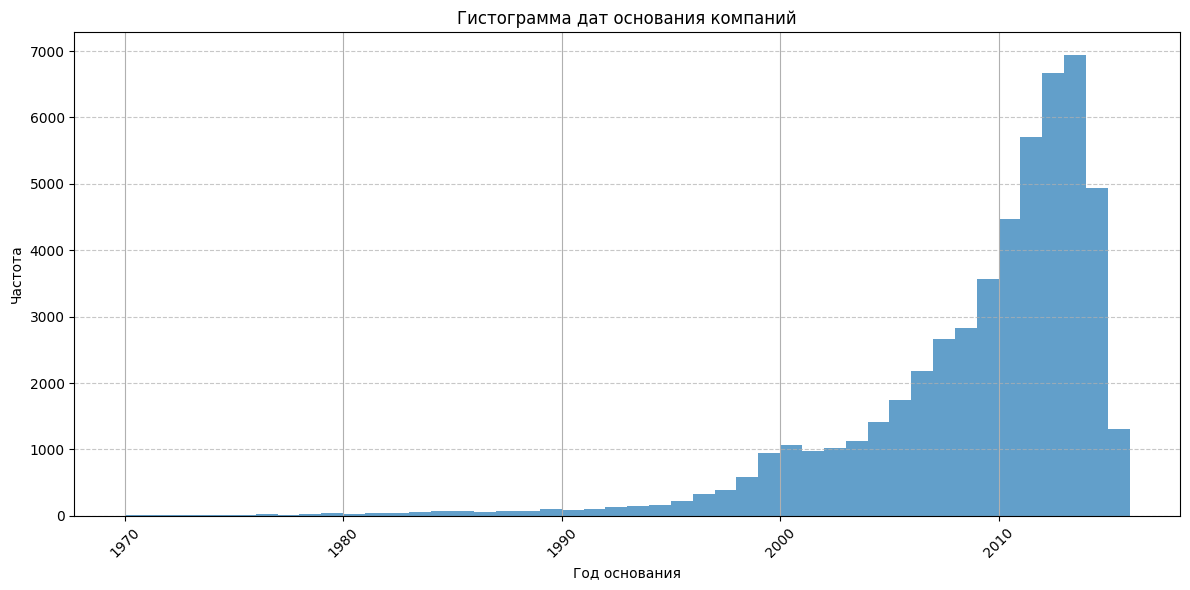

In [192]:
plt.figure(figsize=(12, 6))
pd.to_datetime(data_train['founded_at']).dt.year.hist(bins=range(int(pd.to_datetime(data_train['founded_at']).dt.year.min()), 
                                                               int(pd.to_datetime(data_train['founded_at']).dt.year.max()) + 1), 
                                                     alpha=0.7)
plt.title('Гистограмма дат основания компаний')
plt.xlabel('Год основания')
plt.ylabel('Частота')
plt.xticks(rotation=45)  # Поворот подписей годов для лучшей читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Количества компаний постепенно начинает расти с 1995 по 2000 года. Наибольшее количество компаний было основано в 2012-2013 годах — свыше 6600. После этого периода наблюдается существенное снижение числа новых компаний.


`category_list`
\
Обработаем столбец с категориями. Создайте новый столбец, в котором каждой компании будет присвоена основная категория из списка.

In [193]:
data_train['primary_category'] = data_train['category_list'].str.split('|').str[0]
data_test['primary_category'] = data_test['category_list'].str.split('|').str[0]

In [194]:
data_train.head()

,name,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,lifetime,lifetime_category,primary_category
0,Lunchgate,online reservations|restaurants,828626.0,operating,che,25,zurich,zürich,2,2010-06-24,2011-05-01,2014-12-01,2018-01-01,2748,5-10 лет,online reservations
1,EarLens,manufacturing|medical|medical devices,42935019.0,operating,usa,ca,sf bay area,redwood city,4,2005-01-01,2010-05-04,2014-02-25,2018-01-01,4748,10-20 лет,manufacturing
2,Reviva Pharmaceuticals,biotechnology,35456381.0,operating,usa,ca,sf bay area,san jose,3,2006-01-01,2012-08-20,2014-07-02,2018-01-01,4383,10-20 лет,biotechnology
3,Sancilio and Company,health care,22250000.0,operating,usa,ca,sf bay area,san francisco,3,2004-01-01,2011-09-01,2014-07-18,2018-01-01,5114,10-20 лет,health care
4,WireTough Cylinders,manufacturing,2000000.0,operating,usa,va,va - other,bristol,1,2010-07-30,2012-02-01,2012-02-01,2018-01-01,2712,5-10 лет,manufacturing


In [195]:
data_test.head()

,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,closed_at,lifetime,lifetime_category,primary_category
0,Crystalsol,clean technology,2819200.0,nic,17,sf bay area,san francisco,1,2008-06-01,2009-07-01,2009-07-01,2018-01-01,3501,5-10 лет,clean technology
1,JBI Fish & Wings,hospitality,2000000.0,usa,tn,tn - other,humboldt,1,2010-07-25,2010-07-28,2010-07-28,2018-01-01,2717,5-10 лет,hospitality
2,COINPLUS,finance,428257.0,lux,3,esch-sur-alzette,esch-sur-alzette,2,2014-06-16,2014-05-15,2014-09-18,2018-01-01,1295,1-5 лет,finance
3,Imagine Communications,software|video|video streaming,34700000.0,usa,ca,san diego,san diego,4,2005-01-01,2005-01-01,2010-04-20,2018-01-01,4748,10-20 лет,software
4,DNA13,software,4530000.0,can,on,ottawa,ottawa,1,2001-01-01,2007-05-08,2007-05-08,2018-01-01,6209,10-20 лет,software


Целевой признак `status`

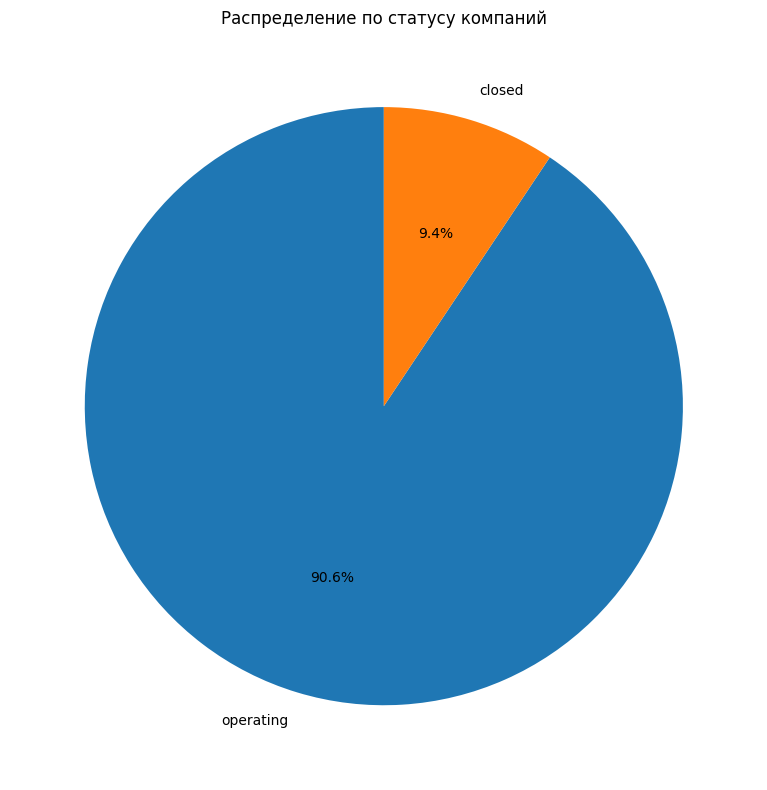

In [196]:
plt.figure(figsize=(8, 8))
data_train['status'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Распределение по статусу компаний')
plt.ylabel('')
plt.tight_layout()
plt.show()

Большая часть стартапов находится в активной фазе развития 90.6%, в то время как стартапов, завершивших свою деятельность, значительно меньше — 9.4%. Такое неравномерное распределение может свидетельствовать о различиях в успешности и стабильности стартапов на долгосрочную перспективу.

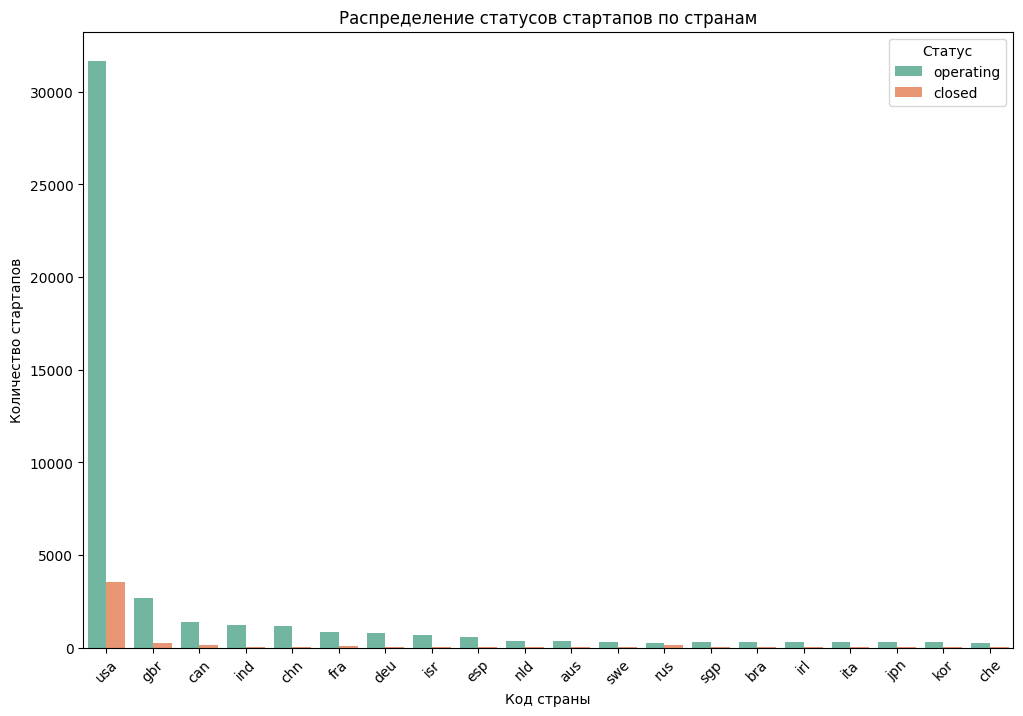

In [197]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data_train, x='country_code', hue='status', palette='Set2', order=data_train['country_code'].value_counts().head(20).index)
plt.title('Распределение статусов стартапов по странам')
plt.xlabel('Код страны')
plt.ylabel('Количество стартапов')
plt.xticks(rotation=45)
plt.legend(title='Статус')
plt.show()

Безаговорочным лидером по количеству стартапов среди стран является USA, количество стартапов превышает 31000. 

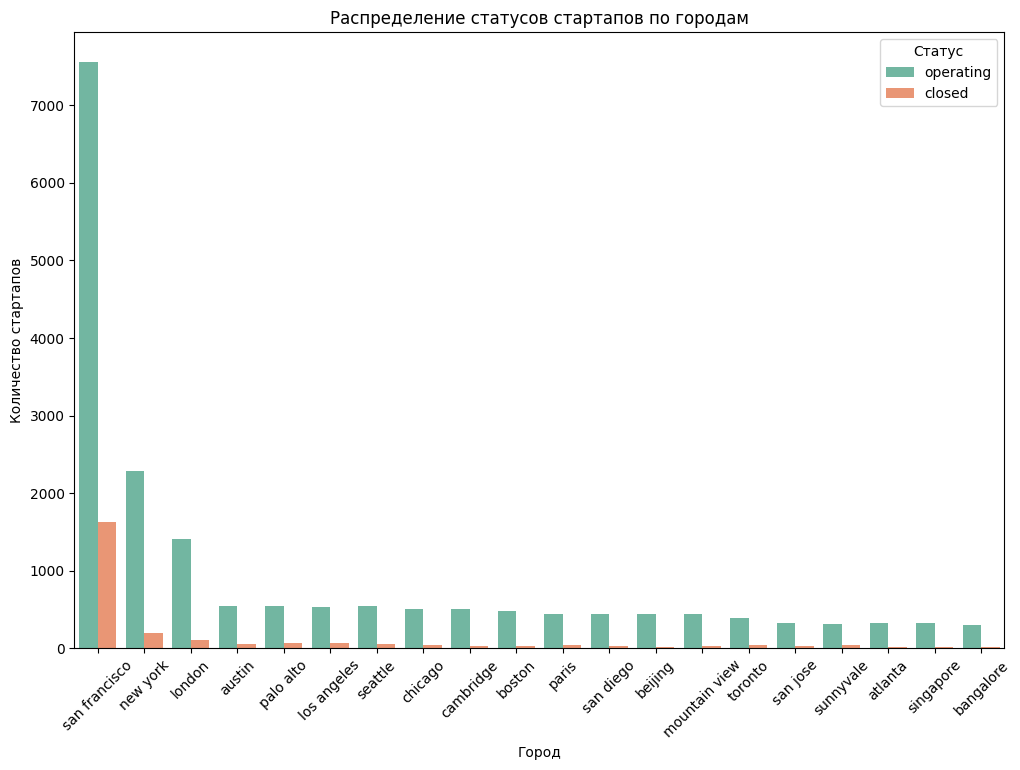

In [198]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data_train, x='city', hue='status', palette='Set2', order=data_train['city'].value_counts().head(20).index)
plt.title('Распределение статусов стартапов по городам')
plt.xlabel('Город')
plt.ylabel('Количество стартапов')
plt.xticks(rotation=45)
plt.legend(title='Статус')
plt.show()

san_francisco является абсолютным лидером по числу стартапов среди городов, их число превышает 7500.

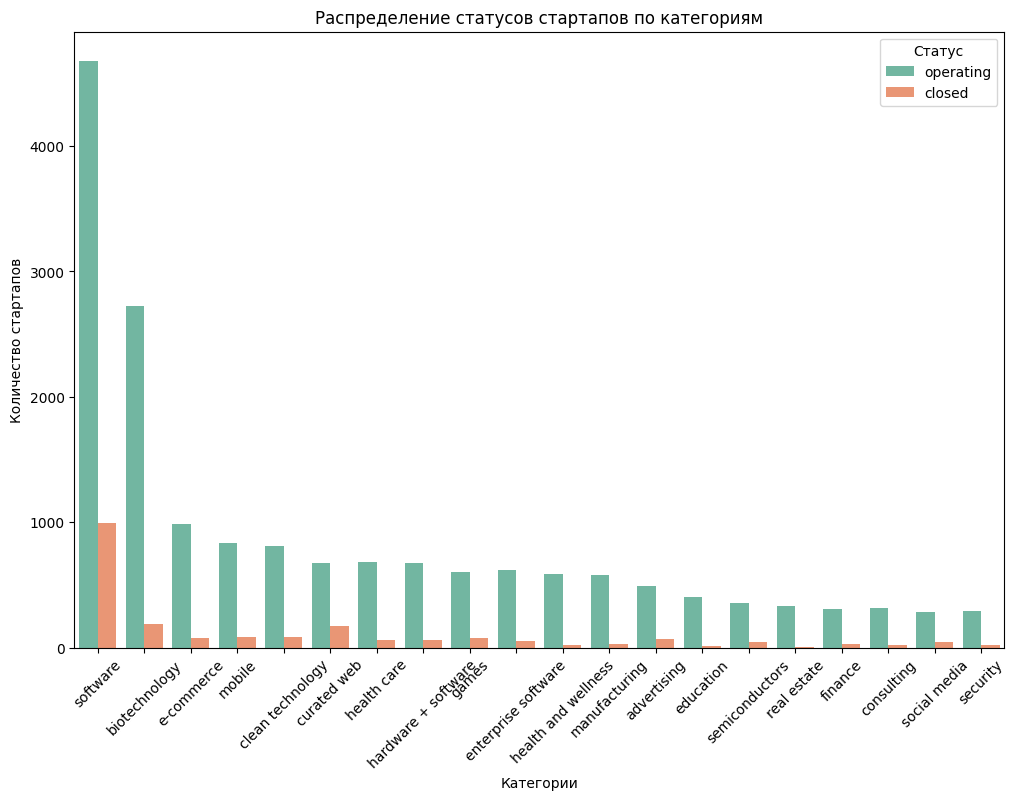

In [199]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data_train, x='category_list', hue='status', palette='Set2', order=data_train['category_list'].value_counts().head(20).index)
plt.title('Распределение статусов стартапов по категориям')
plt.xlabel('Категории')
plt.ylabel('Количество стартапов')
plt.xticks(rotation=45)
plt.legend(title='Статус')
plt.show()

Из графиков можно сделать вывод, что к самым популярным категориям для действующих стартапов можно отнести biotechnology и software. Количество стартапов в данных областях превышает 3000.


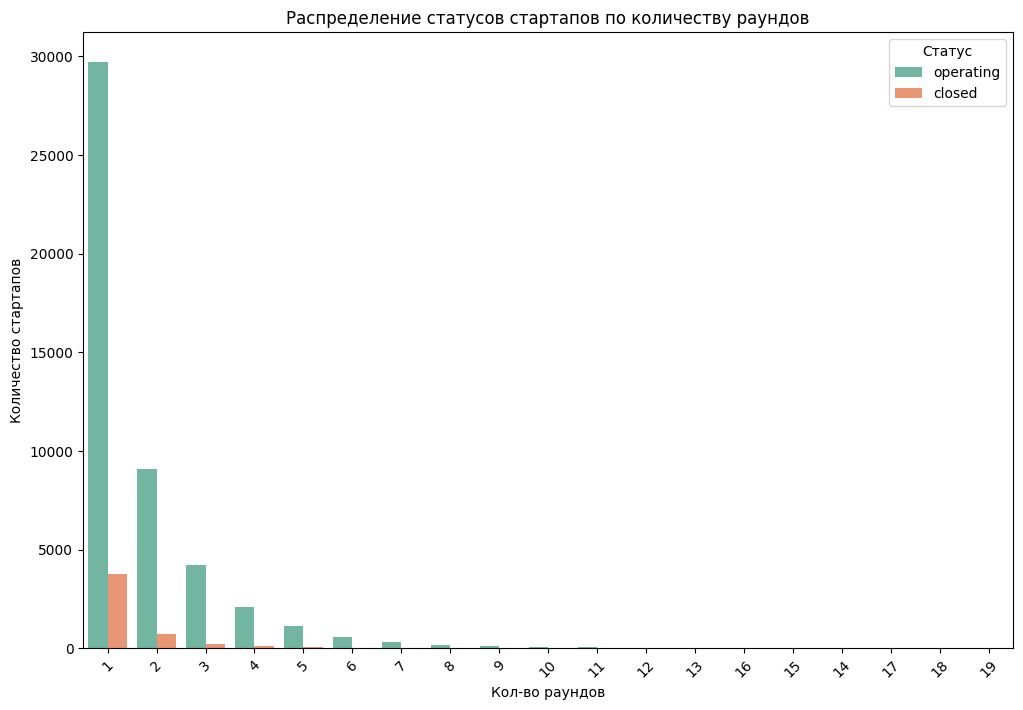

In [200]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data_train, x='funding_rounds', hue='status', palette='Set2', order=data_train['funding_rounds'].value_counts().head(20).index)
plt.title('Распределение статусов стартапов по количеству раундов')
plt.xlabel('Кол-во раундов')
plt.ylabel('Количество стартапов')
plt.xticks(rotation=45)
plt.legend(title='Статус')
plt.show()

Большее количество стартапов, как закрытых, так и действующих имели 1 раунд финансирования.

`funding_total_usd`

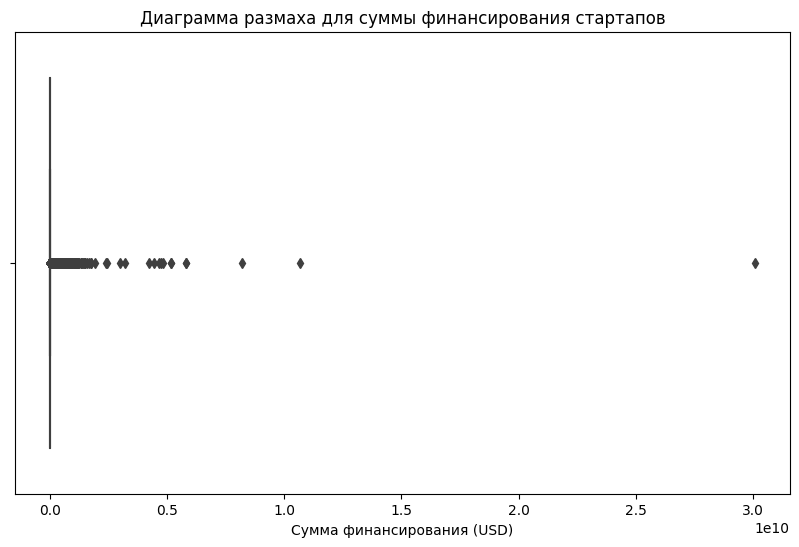

In [201]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_train['funding_total_usd'])
plt.title('Диаграмма размаха для суммы финансирования стартапов')
plt.xlabel('Сумма финансирования (USD)')
plt.show()

График демонстрирует значительное количество аномальных значений, но их количество настолько велико, что просто удалить их нельзя.

## Проверка на мультиколлинеарность

interval columns not set, guessing: ['funding_total_usd', 'funding_rounds', 'lifetime']


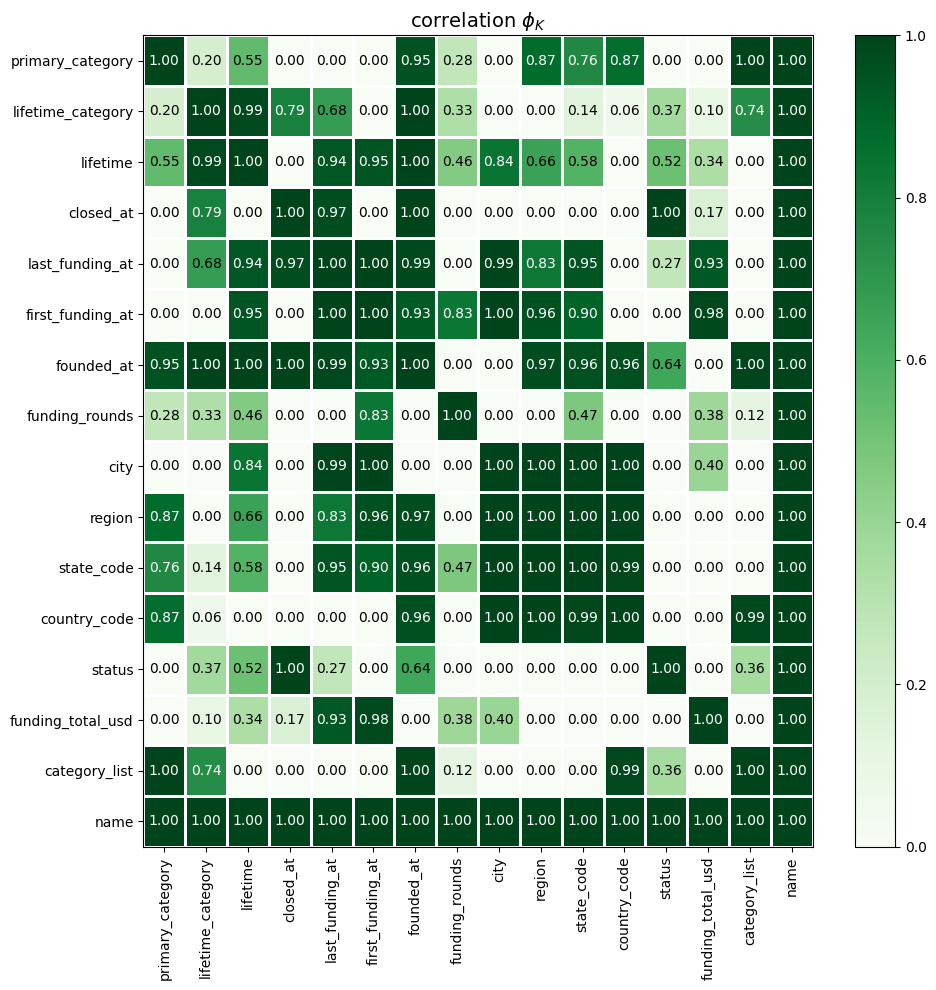

In [202]:
phik_overview = data_train.sample(1000).phik_matrix()
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Greens', title=r'correlation $\phi_K$', fontsize_factor=1,
                        figsize=(10,10))
plt.tight_layout()

In [203]:

columns_train = ['funding_total_usd', 'status', 'country_code', 'state_code', 'funding_rounds', 'lifetime', 'lifetime_category', 'primary_category']
columns_test = ['funding_total_usd', 'country_code', 'state_code', 'funding_rounds', 'lifetime', 'lifetime_category', 'primary_category']

df_train = data_train[columns_train].copy()
df_test = data_test[columns_test].copy()

**Вывод:** Aнализ матрицы показал, что многие признаки сильно коррелируют между собой. Признак `name` уникальный, при обучении его использовать не будем. `status` коррелирует с датой закрытия 'closed_at', т.к. с помощью нее он и получен. Не используем 'closed_at' в финальном списке признаков. Признаки даты - тоже сильно коррелируют с другими признаками.
С географическими данными тоже наблюдается высокая корреляция. У признака category_list не наблюдается корреляции с целевым признаком, а вот у primary_category, которые мы выделили, корреляция есть.\
Для дальнейшего анализа будем использовать следующие признаки:\
\
Числовые
- funding_total_usd
- funding_rounds
- lifetime

Категориальные
- country_code
- state_code
- lifetime_category
- primary_category

In [204]:
df_train.head()

,funding_total_usd,status,country_code,state_code,funding_rounds,lifetime,lifetime_category,primary_category
0,828626.0,operating,che,25,2,2748,5-10 лет,online reservations
1,42935019.0,operating,usa,ca,4,4748,10-20 лет,manufacturing
2,35456381.0,operating,usa,ca,3,4383,10-20 лет,biotechnology
3,22250000.0,operating,usa,ca,3,5114,10-20 лет,health care
4,2000000.0,operating,usa,va,1,2712,5-10 лет,manufacturing


## Подготовка данных и выбор лучшей модели

In [205]:
features = df_train.drop(['status'], axis=1)
target = df_train['status']
target = target.replace({'operating':0, 'closed':1})


In [206]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52550 entries, 0 to 52549
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   funding_total_usd  52550 non-null  float64
 1   country_code       52550 non-null  object 
 2   state_code         52550 non-null  object 
 3   funding_rounds     52550 non-null  int64  
 4   lifetime           52550 non-null  int64  
 5   lifetime_category  52550 non-null  object 
 6   primary_category   52550 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.8+ MB


In [207]:
TEST_SIZE = 0.2
RANDOM_STATE = 12345

In [208]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size = TEST_SIZE, random_state = RANDOM_STATE, stratify=target)
data_train.shape, data_test.shape

((52550, 16), (13211, 15))

In [209]:
len(features_train)/len(features)

0.8

In [210]:
len(features_test)/len(features)

0.2

In [211]:
categorical = features.select_dtypes(include=['object']).columns.tolist()
numeric = features.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [212]:
categorical

['country_code', 'state_code', 'lifetime_category', 'primary_category']

In [213]:
numeric

['funding_total_usd', 'funding_rounds', 'lifetime']

In [214]:

categorical_transformer = Pipeline(
    [
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False, max_categories=10))
]
)

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

data_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical),
        ('num', numeric_transformer, numeric)
    ],
    remainder='passthrough'
)


In [215]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 20),
        'models__max_features': range(2, 20),
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'models__class_weight': ['balanced', None]
    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE, solver='liblinear', penalty='l1')],
        'models__C': range(1, 10),
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'models__class_weight': ['balanced', None]
    },
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 8),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    {
        'models': [RandomForestClassifier(random_state=RANDOM_STATE)],
        'models__n_estimators': [50, 100, 150],
        'models__max_depth': [None, 10, 20, 30],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), 'passthrough'],
        'models__class_weight': ['balanced', None]
    }
]

grid = GridSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='f1', 
    verbose=2,
    error_score='raise',
    n_jobs=-1)


grid.fit(features_train, target_train)

print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
print('F1 лучшей модели:', grid.best_score_.round(2))

Fitting 5 folds for each of 2088 candidates, totalling 10440 fits


Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 max_categories=10,
                                                                                 sparse_output=False))]),
                                                  ['country_code', 'state_code',
                                                   'lifetime_category',
                                                   'primary_category']),
                                                 ('num',
                                                  P

In [216]:
target_pred = grid.predict(features_test)
print(f"F1 = {f1_score(target_test, target_pred, pos_label=1):.2f}")

F1 = 0.70


## Вывод

**Модель, показавшая лучший результат:**

- DecisionTreeClassifier(max_depth=7, max_features=9, random_state=42)
- MinMaxScaler() применялся для масштабирования числовых признаков
- lifetime наиболее важный признак
- Метрика лучшей модели на кросс-валидации: 0.6830379886708718